In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/skillissue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/skillissue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/skillissue/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/skillissue/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/skillissue/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/skillissue/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [3]:
df = pd.read_csv("fake_job_postings.csv")

In [4]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
df = df["company_profile"]
df

0        We're Food52, and we've created a groundbreaki...
1        90 Seconds, the worlds Cloud Video Production ...
2        Valor Services provides Workforce Solutions th...
3        Our passion for improving quality of life thro...
4        SpotSource Solutions LLC is a Global Human Cap...
                               ...                        
17875    Vend is looking for some awesome new talent to...
17876    WebLinc is the e-commerce platform and service...
17877    We Provide Full Time Permanent Positions for m...
17878                                                  NaN
17879    Vend is looking for some awesome new talent to...
Name: company_profile, Length: 17880, dtype: object

In [6]:
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 17880 entries, 0 to 17879
Series name: company_profile
Non-Null Count  Dtype 
--------------  ----- 
14572 non-null  object
dtypes: object(1)
memory usage: 139.8+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
# Neccessary stop words for text processing
NEGATION_STOPWORDS = [
    "no", "not", "nor", "never", "n't", "cannot",
    "don't", "doesn't", "didn't", "won't", "wouldn't",
    "shouldn't", "can't", "couldn't", "isn't", "aren't",
    "wasn't", "weren't", "nothing", "nowhere", "neither", "nobody", "none"]


class TextProcessor:
     def __init__(self):
          self.stop_words = set(stopwords.words('english')) - set(NEGATION_STOPWORDS)
          self.lemmatizer = WordNetLemmatizer()

     def _remove_stop_words(self, text: str) -> str:
          return " ".join([word for word in text.split() if word not in self.stop_words and len(word)>2])

     def _remove_pattern(self, input_text: str, pattern: str) -> str:
          return re.sub(pattern, '', input_text)

     def _remove_hyberlinks(self, text: str) -> str:
          return re.sub(r'https?://\S+', '', text)

     def _remove_repeated_chars_more_than_2(self, text: str) -> str:
          return re.sub(r'(.)\1{2,}', r'\1', text)

     def _remove_punc(self, text: str) -> str:
          text = re.sub(r'\d+', '', text) # Remove digits
          text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
          text = re.sub(r'\s+', ' ', text).strip() # Replace spaces
          return text

     def _get_wordnet_pos(self, treebank_tag):
          if treebank_tag.startswith('J'):
               return wordnet.ADJ
          elif treebank_tag.startswith('V'):
               return wordnet.VERB
          elif treebank_tag.startswith('N'):
               return wordnet.NOUN
          elif treebank_tag.startswith('R'):
               return wordnet.ADV
          else:
               return wordnet.NOUN

     def _tokeniz_lemm(self, text: str) -> str:
          tokens = word_tokenize(text)
          pos_tags = pos_tag(tokens)
          lemmatized = [self.lemmatizer.lemmatize(word, self._get_wordnet_pos(pos)) for word, pos in pos_tags]
          return " ".join(lemmatized)

     def process_text(self, text: str) -> str:
          text = text.lower()
          text = self._remove_pattern(text, r'@\w+')
          text = self._remove_hyberlinks(text)
          text = self._remove_repeated_chars_more_than_2(text)
          text = self._remove_punc(text)
          text = self._remove_stop_words(text)
          text = self._tokeniz_lemm(text)
          return text

In [10]:
processor = TextProcessor()
X_train_processed = X_train.apply(processor.process_text)
X_test_processed = X_test.apply(processor.process_text)

In [11]:
X_train_processed

7526     middle east recruitment specialize recruitment...
10574    magmic lead developer publisher mobile social ...
2570     data thing beauty think soat seabourne build w...
5644     brand apps excite young company create mobile ...
15185    visual one lead fast grow firm focus exclusive...
                               ...                        
6666     quality accommodation exceptional service memo...
16212    mission client preserve independence enhance q...
6939     team top source talent know within technical i...
1024     daily secret one fast grow digital medium bran...
9198     provide full time permanent position many medi...
Name: company_profile, Length: 11657, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=2000)
X_train_vic = vectorizer.fit_transform(X_train_processed)
X_test_vic = vectorizer.transform(X_test_processed)

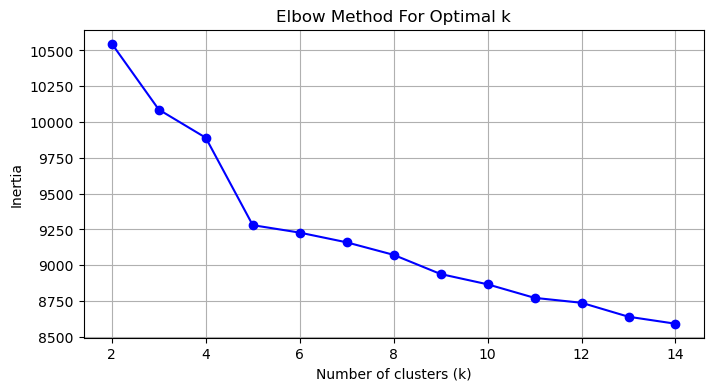

In [14]:
inertia = []
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_vic)
    inertia.append(km.inertia_)

# 4. Plot the elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [15]:
optimal_k = 5
model = KMeans(n_clusters=optimal_k, random_state=42)
labels = model.fit_predict(X_train_vic)


In [16]:
labels

array([2, 2, 2, ..., 2, 2, 0], shape=(11657,), dtype=int32)

In [17]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train_vic, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.15683623927605791


# LDA

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
vectorizer = CountVectorizer(binary=False, max_df=0.7, max_features=2000)
X_train_vic = vectorizer.fit_transform(X_train_processed)
X_test_vic = vectorizer.transform(X_test_processed)

In [20]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_train_vic)

def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)

Topic 0:
company | team | technology | people | work | business | help | product | amp | new
Topic 1:
solution | client | business | process | management | customer | service | improve | communication | drive
Topic 2:
work | company | team | people | opportunity | make | new | create | world | look
Topic 3:
service | home | provide | work | customer | professional | one | company | amp | talent
Topic 4:
candidate | company | service | provide | time | job | full | position | course | medium


In [21]:
topic_assignments = lda.transform(X_test_vic)
df_topic = topic_assignments.argmax(axis=1)

# Show first few examples
print(df_topic)

[0 3 2 ... 3 4 2]


In [22]:
! pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.13.1.tar.gz (57.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [53 lines of output]
      + meson setup /tmp/pip-install-3cehelsq/scipy_608f5ec3aaf5496eb1629afbf37941bf /tmp/pip-install-3cehelsq/scipy_608f5ec3aaf5496eb1629afbf37

In [23]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

panel = pyLDAvis.lda_model.prepare(lda, X_train_vic, vectorizer, mds='tsne')
pyLDAvis.display(panel)

ModuleNotFoundError: No module named 'pyLDAvis'